# Computer Lab 2 – Model fitting and classification

## Exercise 1 – Model fitting for continuous distributions: multivariate Gaussian
 
In this exercise, you will employ a real dataset (file `heightWeigth.mat`), containing labelled data for two classes, i.e. males and females. Every row of the dataset contains three numbers: the gender (1=male, 2=female), the height (cm) and the weight (kg) of each person in the dataset.

Task: you have to fit class-conditional Gaussian multivariate distributions to these data, and visualize the probability density functions. In particular, you should perform the following: 
 
* Divide the dataset in two parts (males and females). Then work only on one gender at a time. 
* Plot the data of each class (use the scatter( ) function) 
* Visualize the histogram of weight and height (use e.g. the hist( ) function) 
* Calculate the maximum likelihood estimate of the mean and covariance matrix under a multivariate Gaussian model, independently for each class (these are the parameters of the class-conditional distributions). Note: is the Gaussian model good for these data? 
* Visualize the 2-D joint pdf of weight and height. Note: inside a Matlab figure, you can use the “Rotate 3D button” to change the viewpoint.

## Multivariate Gaussian: Theory

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.io
import seaborn as sns
import sys
from tqdm import tqdm

# Plots
sns.set_context(
    'talk', rc = {
        'font.size': 12.0,
        'axes.labelsize': 10.0,
        'axes.titlesize': 10.0,
        'xtick.labelsize': 10.0,
        'ytick.labelsize': 10.0,
        'legend.fontsize': 10.0,
        'legend.title_fontsize': 12.0,
        'patch.linewidth': 2.0
        }
    ) # 'paper'

sys.path += ['../../']

from config import DATA_PATH

In [66]:
FILE_NAME = "heightWeight.mat"

try:
    data = scipy.io.loadmat(DATA_PATH + FILE_NAME)
    print(f"Data ✓")
    print(f"Data keys: {data.keys()}")
except:
    print(f"Data not found! ({DATA_PATH}, {FILE_NAME})")

Data ✓
Data keys: dict_keys(['__header__', '__version__', '__globals__', 'heightWeightData'])


In [85]:
data_df = pd.DataFrame(
    data['heightWeightData'],
    columns=['gender', 'height', 'weight']
    )

# Lenght of male/female data
round(len(data_df[data_df.gender == 1]) / len(data_df), 2), round(len(data_df[data_df.gender == 2]) / len(data_df), 2), len(data_df)

(0.35, 0.65, 210)

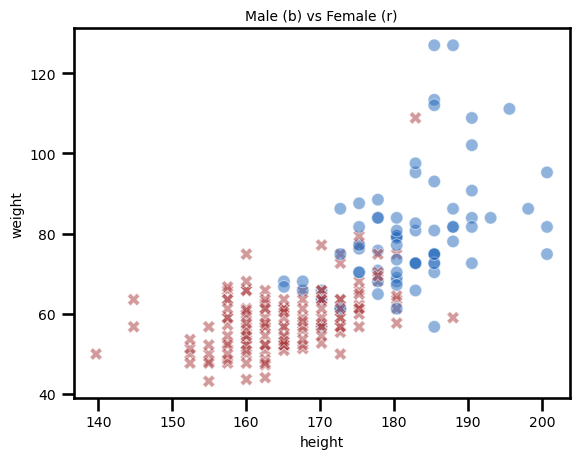

In [68]:
p = sns.scatterplot(
    data=data_df, x='height', y='weight',
    hue='gender', style='gender',
    palette='vlag', alpha=0.5, legend=False
    )

p.set_title(r"Male (b) vs Female (r)")
plt.show()

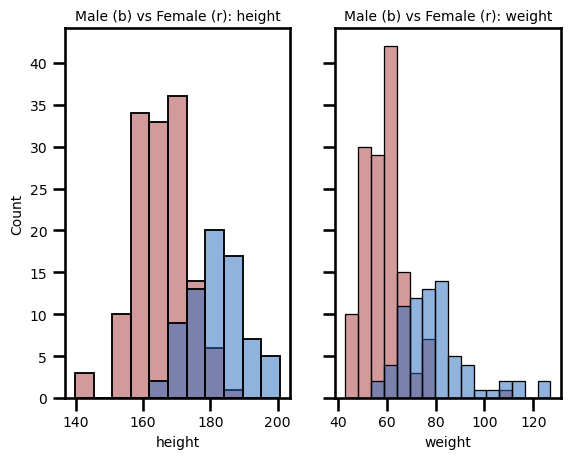

In [86]:
fig = plt.figure()
ax = fig.subplot_mosaic('''
AB
''', sharey=True)

p_order = {
    'height': 'A',
    'weight': 'B'
    }

for feature in ['height', 'weight']:
    sns.histplot(
        data=data_df, x=feature, ax=ax[p_order[feature]],
        hue='gender',
        palette='vlag', alpha=0.5, legend=False
        )

    ax[p_order[feature]].set_title(f"Male (b) vs Female (r): {feature}")

plt.show()